# CMM Project - NodalStatus Prediction for Head and Neck Cancers Based on RNA Gene Expression

# Install Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ranksums
# from scipy.stats import hypergeom
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

# Dataset Description

This dataset is about head and neck cancers. This type of cancer is further categorized by the site or origination (oral cavity, pharynx, larynx, etc.). We have assembled gene expression data from the public domain for a population of patients with early-stage oral cavity head and neck cancer with known lymph-node metastasis status (“NodalStatus”), which can be “positive” (Y=1) or “negative” (Y=0).

In [2]:
features_q2 = pd.read_csv('rnaSeqStudyExprs.csv', index_col=0)
original_features = features_q2
features_q2 = features_q2.T
features_q2

,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,TCEA1,ZNF107,AKAP9,PFDN5,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
TCGA.BA.5556.01,9.945753,11.898950,12.786218,10.648644,10.789364,11.729147,9.324034,7.909321,10.239543,10.539441,...,8.123715,6.618753,8.863572,9.555430,8.711816,10.429525,5.243062,9.131872,10.686056,11.625369
TCGA.BA.5557.01,10.105297,12.268243,12.841083,10.565059,10.550805,11.177724,9.700670,7.495341,9.600417,11.044711,...,7.961530,7.616917,9.148302,9.807835,7.643556,10.271139,6.218354,9.799709,10.707635,11.357616
TCGA.BA.6873.01,9.208601,11.763320,12.413413,10.856284,10.404508,11.704440,10.581472,7.793836,9.979218,10.679885,...,8.576642,6.977333,8.893117,9.542950,9.242854,10.646497,5.186385,9.031375,10.790684,11.957299
TCGA.BA.7269.01,10.977141,12.963765,13.946344,9.687290,9.066772,12.720304,10.919989,6.270282,8.276527,12.305261,...,8.475794,8.786585,10.377020,11.630450,11.461733,10.731445,5.061734,11.652373,11.362617,10.861812
TCGA.BA.A6DB.01,10.056452,12.388894,13.189343,10.567888,10.214464,11.897351,10.204936,7.726940,9.945310,12.113215,...,8.200694,6.546786,9.046553,9.930226,8.500392,10.448795,5.505050,9.961160,11.370684,11.294534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.QK.A6IG.01,10.001661,11.788202,13.601213,10.962555,10.079456,12.500176,10.664068,7.657315,8.850412,11.803251,...,8.205378,7.626268,9.193015,10.854650,7.697301,11.439781,4.698765,9.979445,11.259297,11.652373
TCGA.QK.A6IJ.01,10.960397,11.858230,13.573713,10.206124,9.723633,12.807132,9.629210,7.387336,8.585179,12.513774,...,8.120377,6.581486,9.907597,11.499551,9.782173,11.048609,5.211485,11.013071,10.921394,11.155768
TCGA.T3.A92N.01,9.733154,12.963765,13.419758,10.283485,10.903231,11.472683,10.938614,8.582874,10.485746,12.163441,...,8.910187,5.983818,9.671473,9.614926,10.728535,11.119789,4.944598,9.469333,11.096397,11.801791
TCGA.WA.A7GZ.01,9.150071,12.444397,13.240511,11.079814,10.255659,10.954441,9.959442,8.465918,10.097079,10.704506,...,8.780993,6.836199,9.112513,11.191773,9.776868,11.169904,6.085962,10.994819,11.351588,11.415958


In [3]:
features_q2 = features_q2.reset_index()
features_q2 = features_q2.rename(index=str, columns={"index": "sampleID"})
features_q2 

,sampleID,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,TCEA1,ZNF107,AKAP9,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
0,TCGA.BA.5556.01,9.945753,11.898950,12.786218,10.648644,10.789364,11.729147,9.324034,7.909321,10.239543,...,8.123715,6.618753,8.863572,9.555430,8.711816,10.429525,5.243062,9.131872,10.686056,11.625369
1,TCGA.BA.5557.01,10.105297,12.268243,12.841083,10.565059,10.550805,11.177724,9.700670,7.495341,9.600417,...,7.961530,7.616917,9.148302,9.807835,7.643556,10.271139,6.218354,9.799709,10.707635,11.357616
2,TCGA.BA.6873.01,9.208601,11.763320,12.413413,10.856284,10.404508,11.704440,10.581472,7.793836,9.979218,...,8.576642,6.977333,8.893117,9.542950,9.242854,10.646497,5.186385,9.031375,10.790684,11.957299
3,TCGA.BA.7269.01,10.977141,12.963765,13.946344,9.687290,9.066772,12.720304,10.919989,6.270282,8.276527,...,8.475794,8.786585,10.377020,11.630450,11.461733,10.731445,5.061734,11.652373,11.362617,10.861812
4,TCGA.BA.A6DB.01,10.056452,12.388894,13.189343,10.567888,10.214464,11.897351,10.204936,7.726940,9.945310,...,8.200694,6.546786,9.046553,9.930226,8.500392,10.448795,5.505050,9.961160,11.370684,11.294534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,TCGA.QK.A6IG.01,10.001661,11.788202,13.601213,10.962555,10.079456,12.500176,10.664068,7.657315,8.850412,...,8.205378,7.626268,9.193015,10.854650,7.697301,11.439781,4.698765,9.979445,11.259297,11.652373
105,TCGA.QK.A6IJ.01,10.960397,11.858230,13.573713,10.206124,9.723633,12.807132,9.629210,7.387336,8.585179,...,8.120377,6.581486,9.907597,11.499551,9.782173,11.048609,5.211485,11.013071,10.921394,11.155768
106,TCGA.T3.A92N.01,9.733154,12.963765,13.419758,10.283485,10.903231,11.472683,10.938614,8.582874,10.485746,...,8.910187,5.983818,9.671473,9.614926,10.728535,11.119789,4.944598,9.469333,11.096397,11.801791
107,TCGA.WA.A7GZ.01,9.150071,12.444397,13.240511,11.079814,10.255659,10.954441,9.959442,8.465918,10.097079,...,8.780993,6.836199,9.112513,11.191773,9.776868,11.169904,6.085962,10.994819,11.351588,11.415958


In [4]:
data2 = pd.read_csv('rnaSeqStudyPheno.csv', index_col=0)
data2

,sampleID,patientID,age,gender,site,HPV,Tstage,NstageClin,NstagePath,smoking,smokingDetails,packyears,OStime,OSevent,dataset,NodeStatus
TCGA.BA.5556.01,TCGA.BA.5556.01,TCGA-BA-5556,58.0,F,OC,NaN,T2,NaN,N0,YES,1.0,60.0,23.82,No,TCGA,NEG
TCGA.BA.5557.01,TCGA.BA.5557.01,TCGA-BA-5557,41.0,F,OC,NaN,T2,NaN,N2,NO,0.0,NaN,20.47,No,TCGA,POS
TCGA.BA.6873.01,TCGA.BA.6873.01,TCGA-BA-6873,28.0,M,OC,NaN,T2,NaN,N2,YES,1.0,1.0,4.01,No,TCGA,POS
TCGA.BA.7269.01,TCGA.BA.7269.01,TCGA-BA-7269,61.0,M,OC,NaN,T2,NaN,N1,YES,1.0,46.0,41.82,No,TCGA,POS
TCGA.BA.A6DB.01,TCGA.BA.A6DB.01,TCGA-BA-A6DB,24.0,F,OC,Neg,T2,NaN,N0,NO,0.0,NaN,7.10,No,TCGA,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.QK.A6IG.01,TCGA.QK.A6IG.01,TCGA-QK-A6IG,69.0,M,OC,NaN,T2,NaN,N0,YES,1.0,40.0,7.29,Yes,TCGA,NEG
TCGA.QK.A6IJ.01,TCGA.QK.A6IJ.01,TCGA-QK-A6IJ,71.0,M,OC,Neg,T2,NaN,N0,YES,1.0,40.0,12.71,No,TCGA,NEG
TCGA.T3.A92N.01,TCGA.T3.A92N.01,TCGA-T3-A92N,79.0,M,OC,NaN,T1,NaN,N1,YES,1.0,50.0,3.12,Yes,TCGA,POS
TCGA.WA.A7GZ.01,TCGA.WA.A7GZ.01,TCGA-WA-A7GZ,58.0,M,OC,NaN,T2,NaN,N0,YES,1.0,20.0,20.53,Yes,TCGA,NEG


In [5]:
data2.info() # drop HPV and NstageClin    #impute age, smokingDetails, OStime, (packyears) with mean, smoking with mode

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, TCGA.BA.5556.01 to TCGA.WA.A7H4.01
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sampleID        109 non-null    object 
 1   patientID       109 non-null    object 
 2   age             108 non-null    float64
 3   gender          109 non-null    object 
 4   site            109 non-null    object 
 5   HPV             16 non-null     object 
 6   Tstage          109 non-null    object 
 7   NstageClin      0 non-null      float64
 8   NstagePath      109 non-null    object 
 9   smoking         104 non-null    object 
 10  smokingDetails  104 non-null    float64
 11  packyears       49 non-null     float64
 12  OStime          108 non-null    float64
 13  OSevent         109 non-null    object 
 14  dataset         109 non-null    object 
 15  NodeStatus      109 non-null    object 
dtypes: float64(5), object(11)
memory usage: 14.5+ KB


In [6]:
data2 = data2.drop(columns=['HPV','NstageClin'])

In [7]:
numerical_missing_cols_few = ['age','smokingDetails','OStime','packyears']
for i in numerical_missing_cols_few:
    data2[i].fillna(data2[i].mean(), inplace = True)
categorical_missing_cols = ['smoking']
for j in categorical_missing_cols:
    data2[j].fillna(data2[j].mode().iloc[0], inplace = True)

In [8]:
data2

,sampleID,patientID,age,gender,site,Tstage,NstagePath,smoking,smokingDetails,packyears,OStime,OSevent,dataset,NodeStatus
TCGA.BA.5556.01,TCGA.BA.5556.01,TCGA-BA-5556,58.0,F,OC,T2,N0,YES,1.0,60.000000,23.82,No,TCGA,NEG
TCGA.BA.5557.01,TCGA.BA.5557.01,TCGA-BA-5557,41.0,F,OC,T2,N2,NO,0.0,49.387755,20.47,No,TCGA,POS
TCGA.BA.6873.01,TCGA.BA.6873.01,TCGA-BA-6873,28.0,M,OC,T2,N2,YES,1.0,1.000000,4.01,No,TCGA,POS
TCGA.BA.7269.01,TCGA.BA.7269.01,TCGA-BA-7269,61.0,M,OC,T2,N1,YES,1.0,46.000000,41.82,No,TCGA,POS
TCGA.BA.A6DB.01,TCGA.BA.A6DB.01,TCGA-BA-A6DB,24.0,F,OC,T2,N0,NO,0.0,49.387755,7.10,No,TCGA,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.QK.A6IG.01,TCGA.QK.A6IG.01,TCGA-QK-A6IG,69.0,M,OC,T2,N0,YES,1.0,40.000000,7.29,Yes,TCGA,NEG
TCGA.QK.A6IJ.01,TCGA.QK.A6IJ.01,TCGA-QK-A6IJ,71.0,M,OC,T2,N0,YES,1.0,40.000000,12.71,No,TCGA,NEG
TCGA.T3.A92N.01,TCGA.T3.A92N.01,TCGA-T3-A92N,79.0,M,OC,T1,N1,YES,1.0,50.000000,3.12,Yes,TCGA,POS
TCGA.WA.A7GZ.01,TCGA.WA.A7GZ.01,TCGA-WA-A7GZ,58.0,M,OC,T2,N0,YES,1.0,20.000000,20.53,Yes,TCGA,NEG


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, TCGA.BA.5556.01 to TCGA.WA.A7H4.01
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sampleID        109 non-null    object 
 1   patientID       109 non-null    object 
 2   age             109 non-null    float64
 3   gender          109 non-null    object 
 4   site            109 non-null    object 
 5   Tstage          109 non-null    object 
 6   NstagePath      109 non-null    object 
 7   smoking         109 non-null    object 
 8   smokingDetails  109 non-null    float64
 9   packyears       109 non-null    float64
 10  OStime          109 non-null    float64
 11  OSevent         109 non-null    object 
 12  dataset         109 non-null    object 
 13  NodeStatus      109 non-null    object 
dtypes: float64(4), object(10)
memory usage: 12.8+ KB


In [10]:
# From the above datatype, we find the "object" type predictors
display(data2['gender'].unique())
display(data2['site'].unique())
# display(data2['HPV'].unique())
display(data2['Tstage'].unique())
display(data2['NstagePath'].unique())
display(data2['smoking'].unique())
display(data2['OSevent'].unique())
display(data2['dataset'].unique()) #drop 'dataset'
display(data2['NodeStatus'].unique())

array(['F', 'M'], dtype=object)

array(['OC', 'Lip'], dtype=object)

array(['T2', 'T1'], dtype=object)

array(['N0', 'N2', 'N1'], dtype=object)

array(['YES', 'NO'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['TCGA'], dtype=object)

array(['NEG', 'POS'], dtype=object)

In [11]:
data2 = data2.drop(columns=['dataset'])
data2 = data2.drop(columns=['patientID'])

In [12]:
# Change categorical values in the dataset by Label Encoding
le = LabelEncoder()
categorical_cols = ['NodeStatus','gender','site','Tstage','NstagePath','smoking','OSevent'] # 'gender','site','Tstage','NstagePath','smoking','OSevent','dataset'
for k in categorical_cols:
    data2[k] = le.fit_transform(data2[k])
display(data2)

,sampleID,age,gender,site,Tstage,NstagePath,smoking,smokingDetails,packyears,OStime,OSevent,NodeStatus
TCGA.BA.5556.01,TCGA.BA.5556.01,58.0,0,1,1,0,1,1.0,60.000000,23.82,0,0
TCGA.BA.5557.01,TCGA.BA.5557.01,41.0,0,1,1,2,0,0.0,49.387755,20.47,0,1
TCGA.BA.6873.01,TCGA.BA.6873.01,28.0,1,1,1,2,1,1.0,1.000000,4.01,0,1
TCGA.BA.7269.01,TCGA.BA.7269.01,61.0,1,1,1,1,1,1.0,46.000000,41.82,0,1
TCGA.BA.A6DB.01,TCGA.BA.A6DB.01,24.0,0,1,1,0,0,0.0,49.387755,7.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.QK.A6IG.01,TCGA.QK.A6IG.01,69.0,1,1,1,0,1,1.0,40.000000,7.29,1,0
TCGA.QK.A6IJ.01,TCGA.QK.A6IJ.01,71.0,1,1,1,0,1,1.0,40.000000,12.71,0,0
TCGA.T3.A92N.01,TCGA.T3.A92N.01,79.0,1,1,0,1,1,1.0,50.000000,3.12,1,1
TCGA.WA.A7GZ.01,TCGA.WA.A7GZ.01,58.0,1,1,1,0,1,1.0,20.000000,20.53,1,0


In [15]:
import seaborn as sns

In [16]:
data2_new = data2.drop(columns=['sampleID'])
data2_new.corr()

,age,gender,site,Tstage,NstagePath,smoking,smokingDetails,packyears,OStime,OSevent,NodeStatus
age,1.000000,-0.258581,0.004339,0.042349,-0.119378,1.512605e-01,1.484788e-01,-3.898995e-02,-0.095387,0.272654,-0.065432
gender,-0.258581,1.000000,0.037734,0.020224,0.037228,2.655777e-01,2.867948e-01,3.673971e-02,0.023024,-0.096121,0.040049
site,0.004339,0.037734,1.000000,0.307403,-0.130890,-1.020484e-01,-1.084165e-01,-7.729644e-03,0.047861,0.114641,-0.238258
Tstage,0.042349,0.020224,0.307403,1.000000,-0.131117,-1.773344e-01,-1.763428e-01,4.042301e-02,0.059647,0.071824,-0.145457
NstagePath,-0.119378,0.037228,-0.130890,-0.131117,1.000000,-1.308803e-03,-3.615234e-03,-6.183092e-02,-0.150480,-0.058361,0.929555
smoking,0.151261,0.265578,-0.102048,-0.177334,-0.001309,1.000000e+00,9.865162e-01,4.411193e-17,0.032807,0.237161,0.029286
smokingDetails,0.148479,0.286795,-0.108416,-0.176343,-0.003615,9.865162e-01,1.000000e+00,7.009355e-17,0.022906,0.226575,0.033706
packyears,-0.038990,0.036740,-0.007730,0.040423,-0.061831,4.411193e-17,7.009355e-17,1.000000e+00,-0.011440,-0.126788,-0.041804
OStime,-0.095387,0.023024,0.047861,0.059647,-0.150480,3.280716e-02,2.290589e-02,-1.143978e-02,1.000000,-0.189796,-0.162502
OSevent,0.272654,-0.096121,0.114641,0.071824,-0.058361,2.371614e-01,2.265753e-01,-1.267884e-01,-0.189796,1.000000,-0.006336


<AxesSubplot: >

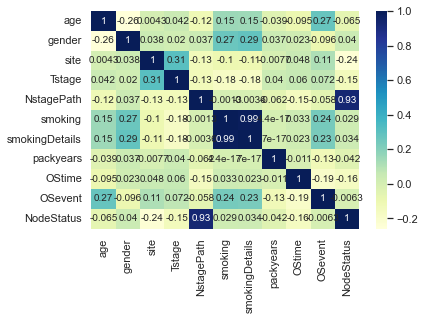

In [17]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.heatmap(data2_new.corr(), cmap="YlGnBu", annot=True)

In [18]:
display(data2.gender.value_counts())
display(data2.site.value_counts()) # drop 'site'
display(data2.Tstage.value_counts())
display(data2.NstagePath.value_counts())
display(data2.smoking.value_counts())
display(data2.OSevent.value_counts())
display(data2.NodeStatus.value_counts())

1    69
0    40
Name: gender, dtype: int64

1    107
0      2
Name: site, dtype: int64

1    91
0    18
Name: Tstage, dtype: int64

0    82
1    15
2    12
Name: NstagePath, dtype: int64

1    70
0    39
Name: smoking, dtype: int64

0    64
1    45
Name: OSevent, dtype: int64

0    82
1    27
Name: NodeStatus, dtype: int64

In [19]:
combined_data = pd.merge(data2[['sampleID','NodeStatus','NstagePath','site']], features_q2, how = 'right', on = 'sampleID')
combined_data

,sampleID,NodeStatus,NstagePath,site,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
0,TCGA.BA.5556.01,0,0,1,9.945753,11.898950,12.786218,10.648644,10.789364,11.729147,...,8.123715,6.618753,8.863572,9.555430,8.711816,10.429525,5.243062,9.131872,10.686056,11.625369
1,TCGA.BA.5557.01,1,2,1,10.105297,12.268243,12.841083,10.565059,10.550805,11.177724,...,7.961530,7.616917,9.148302,9.807835,7.643556,10.271139,6.218354,9.799709,10.707635,11.357616
2,TCGA.BA.6873.01,1,2,1,9.208601,11.763320,12.413413,10.856284,10.404508,11.704440,...,8.576642,6.977333,8.893117,9.542950,9.242854,10.646497,5.186385,9.031375,10.790684,11.957299
3,TCGA.BA.7269.01,1,1,1,10.977141,12.963765,13.946344,9.687290,9.066772,12.720304,...,8.475794,8.786585,10.377020,11.630450,11.461733,10.731445,5.061734,11.652373,11.362617,10.861812
4,TCGA.BA.A6DB.01,0,0,1,10.056452,12.388894,13.189343,10.567888,10.214464,11.897351,...,8.200694,6.546786,9.046553,9.930226,8.500392,10.448795,5.505050,9.961160,11.370684,11.294534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,TCGA.QK.A6IG.01,0,0,1,10.001661,11.788202,13.601213,10.962555,10.079456,12.500176,...,8.205378,7.626268,9.193015,10.854650,7.697301,11.439781,4.698765,9.979445,11.259297,11.652373
105,TCGA.QK.A6IJ.01,0,0,1,10.960397,11.858230,13.573713,10.206124,9.723633,12.807132,...,8.120377,6.581486,9.907597,11.499551,9.782173,11.048609,5.211485,11.013071,10.921394,11.155768
106,TCGA.T3.A92N.01,1,1,1,9.733154,12.963765,13.419758,10.283485,10.903231,11.472683,...,8.910187,5.983818,9.671473,9.614926,10.728535,11.119789,4.944598,9.469333,11.096397,11.801791
107,TCGA.WA.A7GZ.01,0,0,1,9.150071,12.444397,13.240511,11.079814,10.255659,10.954441,...,8.780993,6.836199,9.112513,11.191773,9.776868,11.169904,6.085962,10.994819,11.351588,11.415958


In [20]:
combined_data_without_ID = combined_data.drop(columns=['sampleID'])
corr_matrix = combined_data_without_ID.corr()
corr_matrix

,NodeStatus,NstagePath,site,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,TCEA1,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
NodeStatus,1.000000,0.929555,-0.238258,0.081280,0.051043,-0.021494,0.028910,0.060635,-0.120775,-0.012824,...,0.053523,-0.007069,0.188800,-0.016319,-0.046710,0.120798,-0.042228,-0.003912,-0.027111,-0.114694
NstagePath,0.929555,1.000000,-0.130890,0.041728,0.001351,-0.106909,0.093524,0.100796,-0.141071,0.002661,...,0.004937,0.024834,0.102602,-0.053257,-0.111857,0.014513,0.011001,-0.036871,-0.072915,-0.088848
site,-0.238258,-0.130890,1.000000,0.060580,0.052955,-0.196914,-0.249780,0.003153,0.008855,0.076149,...,-0.048612,-0.153597,-0.099553,-0.009204,0.081357,-0.111090,-0.048917,0.064633,-0.003602,-0.038454
ATOX1,0.081280,0.041728,0.060580,1.000000,0.090496,0.381529,-0.449921,-0.430097,0.501762,-0.278667,...,0.075947,-0.175772,0.513886,0.646474,-0.118159,0.321279,-0.214833,0.473793,0.108113,-0.446140
SQSTM1,0.051043,0.001351,0.052955,0.090496,1.000000,0.154178,-0.358302,-0.057735,0.215274,-0.040352,...,-0.081652,0.193874,0.089488,-0.003756,0.289238,-0.121894,-0.070320,0.238540,0.227877,0.000327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TBRG4,0.120798,0.014513,-0.111090,0.321279,-0.121894,0.440868,-0.074150,-0.209160,0.280563,0.046208,...,0.450305,-0.230933,0.420676,0.428070,0.088900,1.000000,-0.100350,0.327967,0.208314,-0.125230
NTF3,-0.042228,0.011001,-0.048917,-0.214833,-0.070320,0.099710,0.301216,-0.029069,-0.023362,0.022582,...,-0.067728,0.383185,-0.127361,-0.069665,-0.003123,-0.100350,1.000000,0.182204,0.134460,-0.088230
DGCR6L,-0.003912,-0.036871,0.064633,0.473793,0.238540,0.477598,-0.266310,-0.544733,0.452026,0.016941,...,0.302600,0.217220,0.509561,0.592710,0.204725,0.327967,0.182204,1.000000,0.367464,-0.298063
MDH1,-0.027111,-0.072915,-0.003602,0.108113,0.227877,0.539839,-0.073475,-0.092643,0.309263,0.092380,...,0.310048,0.104962,0.165892,0.264167,0.251738,0.208314,0.134460,0.367464,1.000000,0.087866


In [21]:
sorted(np.abs(corr_matrix['NodeStatus']), reverse = True)[1000]

0.13095381095540712

In [22]:
# feature selection based on Wilcoxon rank sum test
genes = original_features.index.values
feature_values = original_features.values
p_value = []
for index, feature_name in enumerate(genes):
    x = feature_values[index, data2['NodeStatus'].values.flatten()==0]
    y = feature_values[index, data2['NodeStatus'].values.flatten()==1]
    p = ranksums(x, y)[-1] 
    p_value.append([feature_name, p])
    
sorted_pvalues = sorted(p_value, key=lambda x: x[1], reverse=False)
sorted_index = []
sorted_value = []
for j in range(len(sorted_pvalues)):
    index = sorted_pvalues[j][0]
    sorted_index.append(index)
    sorted_value.append(sorted_pvalues[j][1])
print('indices of the top 10 features are:', '\n',sorted_index[:10])
# print('\n')
# print('values of the top 10 features are:', '\n', sorted_value[:20])

indices of the top 10 features are: 
 ['SLC35C1', 'FDX1', 'HSD17B12', 'TBC1D14', 'ZNF738', 'VPS26B', 'ZNF493', 'JMJD6', 'SPIRE1', 'CNN2']


Distribution of the first 9 differentially expressed genes


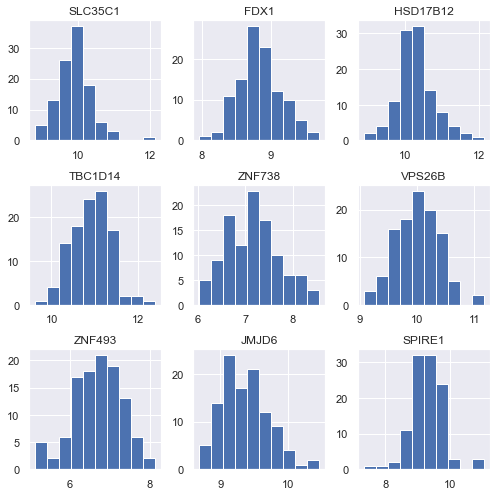

In [23]:
# visualize some of the most different features
top9_index = sorted_index[:9]
top_9_data = original_features.T[top9_index]
# top10 = top_10_data.astype(float)
top_9_data.hist(figsize=(7,7))
plt.tight_layout()
print('Distribution of the first 9 differentially expressed genes')
plt.show()

In [24]:
# train, validation, test
negative_number = np.sum(combined_data['NodeStatus']==0)
positive_number = np.sum(combined_data['NodeStatus']==1)
negative_index = list(combined_data[combined_data['NodeStatus']==0].index)
positve_index = list(combined_data[combined_data['NodeStatus']==1].index)
np.random.seed(123)
np.random.shuffle(negative_index) # random set the index to formulate the three datasets, avoid bias
np.random.shuffle(positve_index)
test_index = negative_index[:round(negative_number*0.2)] + positve_index[:round(positive_number*0.2)]
np.random.shuffle(test_index)
# validation_index = negative_index[round(negative_number*0.2):round(negative_number*0.4)] + positve_index[round(positive_number*0.2):round(positive_number*0.4)]
# np.random.shuffle(validation_index)
train_index = negative_index[round(negative_number*0.2):] + positve_index[round(positive_number*0.2):]
np.random.shuffle(train_index)

train_set = combined_data.iloc[train_index]
# validation_set = combined_data.iloc[validation_index]
test_set = combined_data.iloc[test_index]

X_train = train_set.drop(columns=['NodeStatus'])
y_train = train_set['NodeStatus']
# X_validation = validation_set.drop(columns=['NodeStatus'])
# y_validation = validation_set['NodeStatus']
X_test = test_set.drop(columns=['NodeStatus'])
y_test = test_set['NodeStatus']

In [25]:
X_train

,sampleID,NstagePath,site,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,TCEA1,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
38,TCGA.CR.7376.01,0,1,9.425241,12.657388,12.388894,10.328179,10.454282,11.453206,9.843759,...,7.780905,7.728662,8.433204,9.256348,7.934020,9.808465,5.934979,9.120168,10.623032,11.592680
77,TCGA.CV.A6K0.01,0,1,9.287382,12.263342,13.123816,10.861812,10.316720,11.605339,10.131964,...,8.073943,7.066074,8.727798,9.764912,8.232924,10.278323,6.029508,9.164329,10.855310,11.530586
70,TCGA.CV.7446.01,0,1,8.383145,12.062976,11.641857,10.967052,10.370019,9.436469,10.929950,...,7.843192,9.107180,8.625388,8.653540,11.250539,9.634977,5.452741,8.645551,10.524383,12.543086
31,TCGA.CQ.A4C7.01,0,1,9.497695,11.753280,12.819705,10.841806,10.812230,11.096800,10.346955,...,7.795589,7.385657,8.265568,9.878788,7.268389,10.977141,5.013397,8.883584,10.911347,11.637971
58,TCGA.CV.7236.01,2,1,9.631659,12.925866,12.421723,11.068575,10.775744,11.033770,9.846540,...,8.370708,6.794563,8.890874,9.434809,10.012959,10.693144,5.390546,9.399963,10.621827,11.538678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TCGA.CV.A6JT.01,0,1,10.876056,13.079205,12.983480,10.155901,9.750883,11.660200,9.697139,...,8.373745,6.999934,9.706111,11.324145,9.561458,11.252344,5.657535,10.487323,10.870427,10.604848
83,TCGA.D6.6827.01,1,0,9.004679,12.491186,14.551675,11.543373,10.578592,11.570833,9.789111,...,8.290160,9.063799,9.575955,9.829373,7.637458,10.875348,6.802638,9.404525,11.304013,11.875848
36,TCGA.CR.6488.01,0,1,8.728742,12.000260,12.007673,10.687860,10.104839,11.265311,10.102760,...,8.156569,6.982504,8.177557,9.594145,10.189306,9.647428,5.725690,9.441157,10.745491,11.673953
73,TCGA.CV.A465.01,0,1,9.581295,11.806157,12.838856,10.457800,11.161779,10.786653,10.536611,...,8.069077,7.992201,9.042473,10.005019,9.514506,10.701444,3.854923,9.278428,10.771854,12.167877


In [26]:
X_test

,sampleID,NstagePath,site,ATOX1,SQSTM1,RPS16,TNPO2,RABGAP1,GPX1,TCEA1,...,MTFMT,SV2A,PICK1,NOSIP,AKR1C3,TBRG4,NTF3,DGCR6L,MDH1,ARL6IP1
59,TCGA.CV.7238.01,0,1,9.781964,13.024376,12.470490,10.758271,10.524944,11.006988,10.255200,...,8.190782,5.912098,9.064004,10.077648,9.680406,10.823760,4.681253,9.715244,10.931755,11.126479
10,TCGA.CN.4733.01,0,1,9.427110,12.978600,12.766221,10.204442,10.138981,11.651008,9.744979,...,7.465342,7.774200,8.996008,9.691072,8.485117,10.467987,5.124586,9.626956,10.633392,11.716728
101,TCGA.P3.A6T2.01,0,1,10.015652,12.060946,12.921185,10.539441,10.684814,12.109209,10.095653,...,8.284646,6.970787,9.027928,10.582905,7.866802,10.580588,6.262286,9.217922,11.077014,11.780948
81,TCGA.D6.6515.01,0,1,10.132674,12.272967,12.518417,10.664696,10.105751,11.743245,9.824125,...,7.888123,6.782842,8.623657,9.465573,6.774420,9.899097,5.018003,9.613889,10.821375,12.125613
15,TCGA.CN.5370.01,0,1,9.777319,13.189343,12.539951,10.038150,10.526605,11.838012,10.148226,...,7.754158,8.031963,8.162842,9.443257,10.372609,10.493873,5.621945,8.631402,10.799856,11.501864
80,TCGA.CX.A4AQ.01,2,1,10.338545,12.921185,13.639523,10.752294,10.352555,12.078757,10.067209,...,8.246203,8.857913,9.776439,10.770181,7.514863,10.568167,7.366982,10.886513,11.546862,11.330887
16,TCGA.CN.5373.01,0,1,9.851966,12.598404,11.835009,10.705749,10.636925,10.686679,9.952588,...,7.718770,7.462880,8.961244,9.637661,7.939290,10.036371,5.428322,9.052255,10.589302,11.100877
84,TCGA.D6.8569.01,0,1,9.558316,12.572164,12.174308,10.397199,9.872325,10.874650,10.203250,...,8.549256,6.929941,8.871966,9.267750,10.147297,10.681768,4.705500,8.898075,11.078203,11.649668
43,TCGA.CR.7401.01,0,1,10.244575,12.646630,12.790439,10.776708,10.114228,11.183858,10.203948,...,7.651334,7.587791,9.190007,9.941781,9.139836,10.341293,5.556616,10.327181,10.909222,11.475386
88,TCGA.DQ.7588.01,1,1,9.618034,11.597702,13.214787,10.143865,9.851552,11.194918,10.809855,...,8.869269,6.749471,8.982537,10.149817,12.271818,11.169904,6.025047,10.273865,11.267171,12.268243


In [27]:
y_test.value_counts()

0    16
1     5
Name: NodeStatus, dtype: int64

In [28]:
# scaling
def standprocess(train,test):
    stdSc = StandardScaler()
    train = stdSc.fit_transform(train)
    test = stdSc.transform(test)
    return train, test

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [30]:
# train model drop features
#Validation function
n_folds = 5
def rmsle_cv(model,x_train,y_train):
    kf = KFold(n_folds, shuffle=True, random_state=123).get_n_splits(x_train)
    auc_score= np.mean(cross_val_score(model, x_train, y_train, cv = kf,scoring='roc_auc'))
    accuracy_score= np.mean(cross_val_score(model, x_train, y_train, cv = kf,scoring='accuracy'))
    return auc_score, accuracy_score
def cv_accuracy(model,x_train,y_train):
    #np.random.seeds(123)
    classifiers = model.fit(x_train, y_train)
    

DT = DecisionTreeClassifier(random_state=123)
svm = SVC(probability = True)
rf = RandomForestClassifier(random_state=123,class_weight='balanced')
knn = KNeighborsClassifier()
#ada =  AdaBoostClassifier(random_state=123)
lr = LogisticRegression(random_state=123, solver='liblinear')
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
NB = GaussianNB()

In [34]:
m=300
X_train_select = X_train[sorted_index[:m]+['NstagePath','site']]
X_test_select = X_test[sorted_index[:m]+['NstagePath','site']]

X_train_select, X_test_select = standprocess(X_train_select,X_test_select)

scorer_1 = rmsle_cv(lr,X_train_select,y_train)[0]
print("Logistic Regression Auc score on RNA-seq dataset: {:.4f}".format(scorer_1.mean()))
scorer_2 = rmsle_cv(lr,X_train_select,y_train)[1]
print("Logistic Regression Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_2))
scorer_3 = rmsle_cv(DT,X_train_select,y_train)[0]
print("Decision Tree Auc score on RNA-seq dataset: {:.4f}".format(scorer_3.mean()))
scorer_4 = rmsle_cv(DT,X_train_select,y_train)[1]
print("Decision Tree Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_4))
scorer_5 = rmsle_cv(LDA,X_train_select,y_train)[0]
print("LDA Auc score on RNA-seq dataset: {:.4f}".format(scorer_5.mean()))
scorer_6 = rmsle_cv(LDA,X_train_select,y_train)[1]
print("LDA Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_6))
scorer_7 = rmsle_cv(QDA,X_train_select,y_train)[0]
print("QDA Auc score on RNA-seq dataset: {:.4f}".format(scorer_7.mean()))
scorer_8 = rmsle_cv(QDA,X_train_select,y_train)[1]
print("QDA Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_8))
scorer_9 = rmsle_cv(NB,X_train_select,y_train)[0]
print("Naive Bayes Auc score on RNA-seq dataset: {:.4f}".format(scorer_9.mean()))
scorer_10 = rmsle_cv(NB,X_train_select,y_train)[1]
print("Naive Bayes Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_10))
scorer_11 = rmsle_cv(rf,X_train_select,y_train)[0]
print("Random Forest Auc score on RNA-seq dataset: {:.4f}".format(scorer_11.mean()))
scorer_12 = rmsle_cv(rf,X_train_select,y_train)[1]
print("Random Forest Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_12))
scorer_13 = rmsle_cv(svm,X_train_select,y_train)[0]
print("SVM Auc score on RNA-seq dataset: {:.4f}".format(scorer_13.mean()))
scorer_14 = rmsle_cv(svm,X_train_select,y_train)[1]
print("SVM Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_14))
scorer_15 = rmsle_cv(knn,X_train_select,y_train)[0]
print("K-NN Auc score on RNA-seq dataset: {:.4f}".format(scorer_15.mean()))
scorer_16 = rmsle_cv(knn,X_train_select,y_train)[1]
print("K-NN Accuracy score on RNA-seq dataset: {:.4f}".format(scorer_16))

Logistic Regression Auc score on RNA-seq dataset: 0.9518
Logistic Regression Accuracy score on RNA-seq dataset: 0.6915
Decision Tree Auc score on RNA-seq dataset: 1.0000
Decision Tree Accuracy score on RNA-seq dataset: 1.0000
LDA Auc score on RNA-seq dataset: 0.9815
LDA Accuracy score on RNA-seq dataset: 0.9203
QDA Auc score on RNA-seq dataset: 0.5999
QDA Accuracy score on RNA-seq dataset: 0.6712


/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site

Naive Bayes Auc score on RNA-seq dataset: 1.0000
Naive Bayes Accuracy score on RNA-seq dataset: 0.9660
Random Forest Auc score on RNA-seq dataset: 0.9454
Random Forest Accuracy score on RNA-seq dataset: 0.8065
SVM Auc score on RNA-seq dataset: 0.9214
SVM Accuracy score on RNA-seq dataset: 0.7627
K-NN Auc score on RNA-seq dataset: 0.8862
K-NN Accuracy score on RNA-seq dataset: 0.8085


In [32]:
auc_accuray = pd.DataFrame(columns=['AUC Score','Accuracy Score'], index = ['Logistic Regression','Decision Tree','LDA','QDA','Naive Bayes','Random Forest','SVM','K-NN'])
auc_accuray['AUC Score'] = [scorer_1.mean(),scorer_3.mean(),scorer_5.mean(),scorer_7.mean(),scorer_9.mean(),scorer_11.mean(),scorer_13.mean(),scorer_15.mean()]
auc_accuray['Accuracy Score'] = [scorer_2,scorer_4,scorer_6,scorer_8,scorer_10,scorer_12,scorer_14,scorer_16]
auc_accuray

,AUC Score,Accuracy Score
Logistic Regression,0.951813,0.691503
Decision Tree,1.000000,1.000000
LDA,0.981538,0.920261
QDA,0.599945,0.671242
Naive Bayes,1.000000,0.966013
Random Forest,0.945440,0.806536
SVM,0.921374,0.762745
K-NN,0.886209,0.808497


In [35]:
def Gridsearchcv(x_train,y_train,model,param,cv_num):
    # random search + cross validation
    gridsearch = GridSearchCV(model,param,cv = cv_num,scoring='roc_auc',n_jobs = 7)
    # train model in train set
    gridsearch.fit(x_train,y_train)
    # return search results for each case
    result = gridsearch.cv_results_
    # for mean_score, params in zip(result["mean_test_score"], result["params"]):
    #      print(np.mean(mean_score), params)
    # # get the best estimator
    best_model = gridsearch.best_estimator_
    '''print('Best model:\n')
    print(best_model)
    print('\n Optimal parameters:')
    print(gridsearch.best_params_)'''
    best_model.fit(x_train,y_train)
    return print(best_model)

In [36]:
m=300
X_train_select = X_train[sorted_index[:m]]
X_test_select = X_test[sorted_index[:m]]


In [ ]:
lr = LogisticRegression(random_state=123)
param = {'penalty':['l1', 'l2'],
    'C':np.logspace(-4, 4, 20),
    'solver':['liblinear'],
    'class_weight':[{0:0.4,1:0.6}, {0:0.42,1:0.58},{0:0.45, 1:0.55}]}
best_lr = Gridsearchcv(X_train_select,y_train,lr,param,5)  

DT = DecisionTreeClassifier(random_state=123)
param = {'criterion': ['gini', 'entropy'], 'splitter':['best','random'],'max_depth':[10,20],'min_samples_leaf':[5,7],
         'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5], 'max_features':['auto', 'sqrt', 'log2']}
best_DT = Gridsearchcv(X_train_select,y_train,DT,param,5)

LDA = LinearDiscriminantAnalysis()
param = {'solver':['svd','lsqr'], 'n_components' : [0,1]}
best_LDA = Gridsearchcv(X_train_select,y_train,LDA,param,5)

rf = RandomForestClassifier(random_state=123)
#print('Grid search results based on microarray dataset:\n')
param = {'n_estimators':[100,300],
               'max_depth':[10,20],
               'min_samples_leaf':[5,7],
               'min_samples_split':[2,5],
        'class_weight':[{0:0.4,1:0.6}, {0:0.42,1:0.58},{0:0.45, 1:0.55}]}
best_rf = Gridsearchcv(X_train_select,y_train,rf,param,5)

svm = SVC(random_state=123)
param = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[1, 10], 'gamma': ['scale','auto'], 'probability':[True, False]}
best_svm = Gridsearchcv(X_train_select,y_train,svm,param,5)

knn = KNeighborsClassifier()
param = {'n_neighbors':list(range(1, 31))}
best_knn = Gridsearchcv(X_train_select,y_train,knn,param,5)

LogisticRegression(C=0.03359818286283781, class_weight={0: 0.4, 1: 0.6},
                   random_state=123, solver='liblinear')


/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=7,
                       min_samples_leaf=7, random_state=123, splitter='random')
LinearDiscriminantAnalysis(n_components=0)
RandomForestClassifier(class_weight={0: 0.42, 1: 0.58}, max_depth=10,
                       min_samples_leaf=5, random_state=123)
SVC(C=1, probability=True, random_state=123)
KNeighborsClassifier(n_neighbors=28)


In [ ]:
m=300
X_train_select = X_train[sorted_index[:m]]
X_test_select = X_test[sorted_index[:m]]

DT = DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=7,
                       min_samples_leaf=7, random_state=123, splitter='random').fit(X_train_select, y_train)
svm = SVC(C=1, probability=True, random_state=123).fit(X_train_select, y_train)
rf = RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, max_depth=10,
                       min_samples_leaf=5, random_state=123).fit(X_train_select, y_train)
knn = KNeighborsClassifier(n_neighbors=28).fit(X_train_select, y_train)
lr = LogisticRegression(C=0.03359818286283781, class_weight={0: 0.4, 1: 0.6},
                   random_state=123, solver='liblinear').fit(X_train_select, y_train)
LDA = LinearDiscriminantAnalysis(n_components=0).fit(X_train_select, y_train)
QDA = QuadraticDiscriminantAnalysis(reg_param=1).fit(X_train_select, y_train)
NB = GaussianNB().fit(X_train_select, y_train)
y_DT = DT.predict(X_test_select)
y_svm = svm.predict(X_test_select)
y_rf = rf.predict(X_test_select)
y_knn = knn.predict(X_test_select)
y_lr = lr.predict(X_test_select)
y_LDA = LDA.predict(X_test_select)
y_QDA = QDA.predict(X_test_select)
y_NB = NB.predict(X_test_select)
scorer_2 = accuracy_score(y_lr, y_test)
scorer_4 = accuracy_score(y_DT, y_test)
scorer_6 = accuracy_score(y_LDA, y_test)
scorer_8 = accuracy_score(y_QDA, y_test)
scorer_10 = accuracy_score(y_NB, y_test)
scorer_12 = accuracy_score(y_rf, y_test)
scorer_14 = accuracy_score(y_svm, y_test)
scorer_16 = accuracy_score(y_knn, y_test)
auc_accuray = pd.DataFrame(columns=['Test Accuracy Score'], index = ['Logistic Regression','Decision Tree','LDA','QDA','Naive Bayes','Random Forest','SVM','K-NN'])
auc_accuray['Test Accuracy Score'] = [scorer_2,scorer_4,scorer_6,scorer_8,scorer_10,scorer_12,scorer_14,scorer_16]
auc_accuray

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Test Accuracy Score
Logistic Regression,0.857143
Decision Tree,0.809524
LDA,0.809524
QDA,0.333333
Naive Bayes,0.761905
Random Forest,0.761905
SVM,0.761905
K-NN,0.761905


In [42]:
def ROC_curve(x_train,y_train,x_test,y_test,model):
    fprs = []
    tprs = []
    threshold = []
    # use model fit training data
    model.fit(x_train,y_train)
    y_train_pred = model.predict_proba(x_train)
    # compute tpr, fpr to plot ROC curve for training set
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred[:,1])
    roc_auc_train = auc(fpr_train, tpr_train)
    # use model predict test data
    y_pred = model.predict_proba(x_test)
    y_preds = model.predict(x_test)
    # compute tpr, fpr to plot ROC curve for test set
    fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred[:,1])
    fprs.append(fpr_test)
    tprs.append(tpr_test)
    threshold.append(thresholds)
    roc_auc_test = auc(fpr_test, tpr_test)
    # Plot ROC curve and compare them
    plt.plot(fpr_train, tpr_train,  linewidth=2, label='Train AUC = %0.2f'% roc_auc_train);
    plt.plot(fpr_test, tpr_test, linewidth=2, label='Test AUC = %0.2f'% roc_auc_test)
    plt.title("Receiving Operating Characteristic")
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return tprs, fprs, threshold

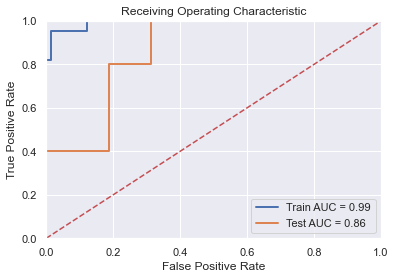

Sensitivity: 1.0
Specificity: 0.6875


In [43]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, lr)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


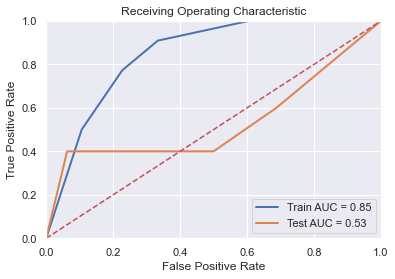

Sensitivity: 1.0
Specificity: 0.0


In [44]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, DT)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

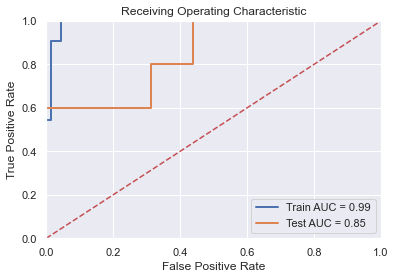

Sensitivity: 1.0
Specificity: 0.5625


In [45]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, LDA)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


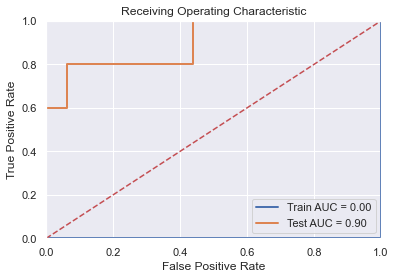

Sensitivity: 1.0
Specificity: 0.5625


In [46]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, QDA)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

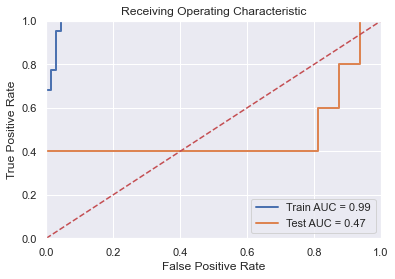

Sensitivity: 1.0
Specificity: 0.0625


In [47]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, NB)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

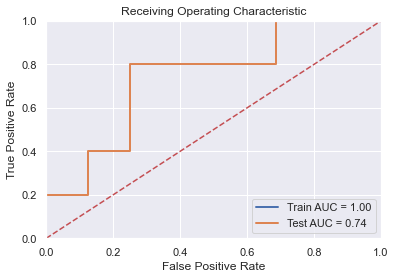

Sensitivity: 1.0
Specificity: 0.3125


In [48]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, rf)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

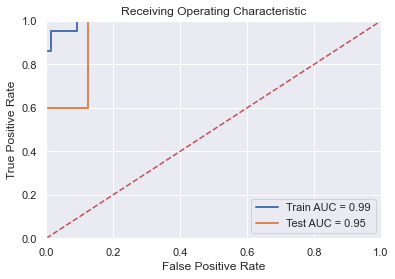

Sensitivity: 1.0
Specificity: 0.875


In [49]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, svm)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

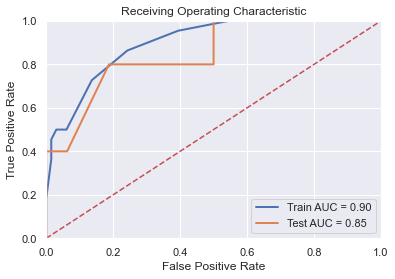

Sensitivity: 1.0
Specificity: 0.5


In [50]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, knn)
print('Sensitivity:',tpr[0][tpr[0]>=0.9][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.9)[0][0]])

In [51]:
m=50
X_train_select = X_train[sorted_index[:m]+['NstagePath','site']]
X_test_select = X_test[sorted_index[:m]+['NstagePath','site']]
X_train_select, X_test_select = standprocess(X_train_select,X_test_select)
DT = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=6, min_samples_leaf=5, random_state=123).fit(X_train_select, y_train)
svm = SVC(C=1, kernel='linear', probability=True, random_state=123).fit(X_train_select, y_train)
rf = RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=10,
                       min_samples_leaf=5, n_estimators=300, random_state=123).fit(X_train_select, y_train)
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train_select, y_train)
lr = LogisticRegression(C=0.08858667904100823, class_weight={0: 0.4, 1: 0.6},
                   penalty='l1', random_state=123, solver='liblinear').fit(X_train_select, y_train)
LDA = LinearDiscriminantAnalysis(n_components=0).fit(X_train_select, y_train)
QDA = QuadraticDiscriminantAnalysis().fit(X_train_select, y_train)
NB = GaussianNB().fit(X_train_select, y_train)
y_DT = DT.predict(X_test_select)
y_svm = svm.predict(X_test_select)
y_rf = rf.predict(X_test_select)
y_knn = knn.predict(X_test_select)
y_lr = lr.predict(X_test_select)
y_LDA = LDA.predict(X_test_select)
y_QDA = QDA.predict(X_test_select)
y_NB = NB.predict(X_test_select)
scorer_2 = accuracy_score(y_lr, y_test)
scorer_4 = accuracy_score(y_DT, y_test)
scorer_6 = accuracy_score(y_LDA, y_test)
scorer_8 = accuracy_score(y_QDA, y_test)
scorer_10 = accuracy_score(y_NB, y_test)
scorer_12 = accuracy_score(y_rf, y_test)
scorer_14 = accuracy_score(y_svm, y_test)
scorer_16 = accuracy_score(y_knn, y_test)
auc_accuray = pd.DataFrame(columns=['Test Accuracy Score'], index = ['Logistic Regression','Decision Tree','LDA','QDA','Naive Bayes','Random Forest','SVM','K-NN'])
auc_accuray['Test Accuracy Score'] = [scorer_2,scorer_4,scorer_6,scorer_8,scorer_10,scorer_12,scorer_14,scorer_16]
auc_accuray

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Test Accuracy Score
Logistic Regression,1.000000
Decision Tree,0.857143
LDA,1.000000
QDA,1.000000
Naive Bayes,1.000000
Random Forest,0.952381
SVM,1.000000
K-NN,0.809524


/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


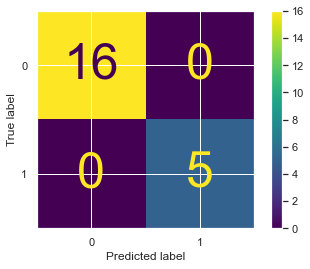

In [53]:
from sklearn.metrics import plot_confusion_matrix
#fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 50})
plot_confusion_matrix(lr, X_test_select, y_test)  

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


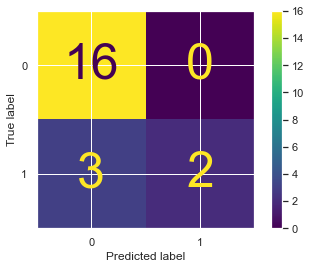

In [54]:
plot_confusion_matrix(DT, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


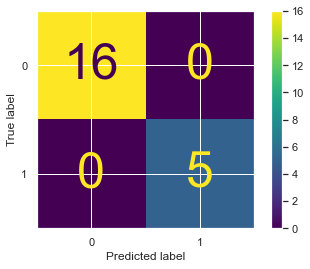

In [55]:
plot_confusion_matrix(LDA, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


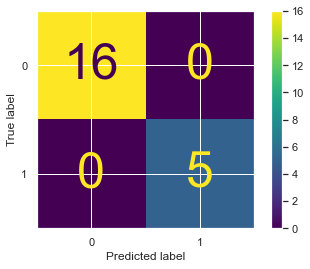

In [56]:
plot_confusion_matrix(QDA, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


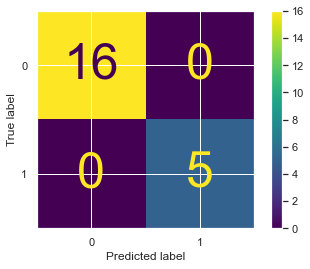

In [57]:
plot_confusion_matrix(NB, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


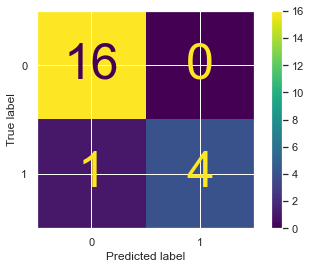

In [58]:
plot_confusion_matrix(rf, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


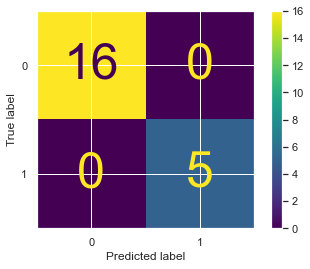

In [59]:
plot_confusion_matrix(svm, X_test_select, y_test)

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


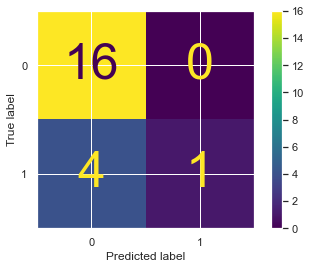

In [60]:
plot_confusion_matrix(knn, X_test_select, y_test)

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=6, min_samples_leaf=5, random_state=123)
svm = SVC(C=1, kernel='linear', probability=True, random_state=123)
rf = RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=10,
                       min_samples_leaf=5, n_estimators=300, random_state=123)
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train_select, y_train)
lr = LogisticRegression(C=0.08858667904100823, class_weight={0: 0.4, 1: 0.6},
                   penalty='l1', random_state=123, solver='liblinear')
LDA = LinearDiscriminantAnalysis(n_components=0)
QDA = QuadraticDiscriminantAnalysis()
NB = GaussianNB()

In [63]:
m=50
X_train_select = X_train[sorted_index[:m]+['NstagePath','site']]
X_test_select = X_test[sorted_index[:m]+['NstagePath','site']]
#X_train_select, X_test_select = standprocess(X_train_select,X_test_select)

In [64]:
X_train_select

,SLC35C1,FDX1,HSD17B12,TBC1D14,ZNF738,VPS26B,ZNF493,JMJD6,SPIRE1,CNN2,...,HDAC3,SUMF1,ABCB10,RAE1,FGFR2,TNFAIP3,RBM22,CCDC97,NstagePath,site
38,10.095653,8.755490,10.212578,11.006988,6.723567,10.224242,6.605112,9.048976,9.649165,12.102964,...,9.866245,9.054907,8.759026,9.088140,9.222173,12.608229,9.791419,9.868008,0,1
77,10.027797,8.760629,10.487873,11.269010,7.247306,10.385122,7.178522,9.109711,8.505401,12.594915,...,10.051043,9.543146,8.947701,9.683327,10.624242,10.960397,9.716913,9.911292,0,1
70,9.514298,9.449665,11.593913,10.378909,8.039642,9.799494,7.744241,9.683327,9.232697,11.269010,...,9.495464,8.934167,9.448660,10.060831,10.370801,12.053227,9.632706,9.535715,0,1
31,10.327676,8.508231,10.260363,11.290689,7.537243,9.801853,7.116445,9.371874,8.979659,12.268243,...,10.471299,9.181299,8.139181,10.029344,9.759306,12.131667,10.067876,9.747304,0,1
58,10.299651,8.775241,10.274606,10.429525,7.296454,10.144092,7.004942,9.676429,9.300774,12.657388,...,9.902384,9.001981,8.587526,9.587532,9.087473,11.995720,9.856239,9.604547,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,10.048712,9.111658,9.083733,10.922124,6.795308,9.994279,6.296137,9.771531,8.755490,12.119219,...,10.431651,9.557047,7.732574,10.042219,8.412319,10.055989,10.273383,9.691272,0,1
83,9.433337,9.409508,10.471010,11.398227,7.884955,11.060602,7.356203,8.729693,10.772820,10.976396,...,10.117035,9.076953,9.483241,10.344413,12.072808,11.767739,10.093144,10.066291,1,0
36,10.848481,8.582874,11.060602,11.375767,7.350063,10.180047,6.678578,8.874721,9.389948,12.367207,...,9.694831,9.472039,8.732991,9.592123,9.655791,10.272639,9.462275,9.634769,0,1
73,9.524718,8.839453,10.994819,10.419731,7.388952,9.844388,7.185559,9.914072,9.764912,11.308780,...,9.797118,9.245781,7.713441,10.664382,9.372505,9.873601,9.875531,9.373973,0,1


In [65]:
m=6666
X_train_select = X_train[sorted_index[:m]+['NstagePath','site']]
X_test_select = X_test[sorted_index[:m]+['NstagePath','site']]
X_train_select, X_test_select = standprocess(X_train_select,X_test_select)
DT = DecisionTreeClassifier(random_state=123)
svm = SVC(random_state =123, probability = True)
rf = RandomForestClassifier(random_state=123,class_weight='balanced')
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=123, solver='liblinear')
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
NB = GaussianNB()

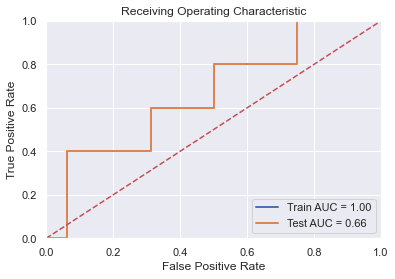

Sensitivity: 0.8
Specificity: 0.5


In [66]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, lr)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

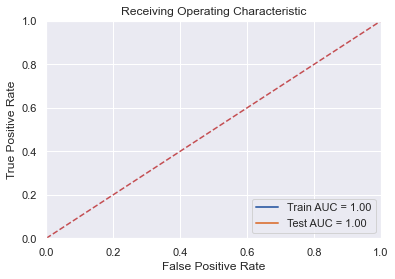

Sensitivity: 1.0
Specificity: 1.0


In [67]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, DT)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

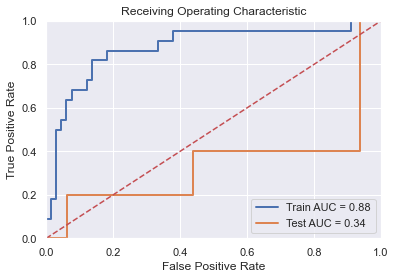

Sensitivity: 1.0
Specificity: 0.0625


In [68]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, LDA)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

/Users/zhiweigong/miniconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


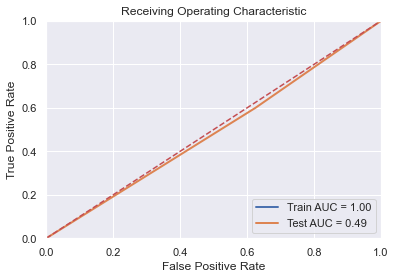

Sensitivity: 1.0
Specificity: 0.0


In [69]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, QDA)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

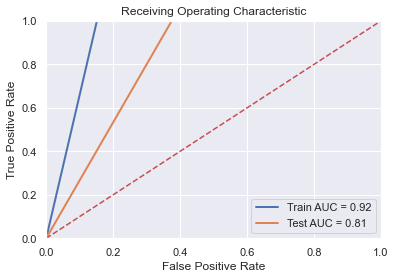

Sensitivity: 1.0
Specificity: 0.625


In [70]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, NB)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

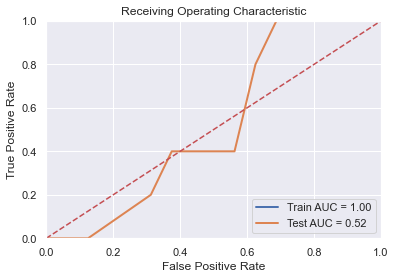

Sensitivity: 0.8
Specificity: 0.375


In [71]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, rf)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

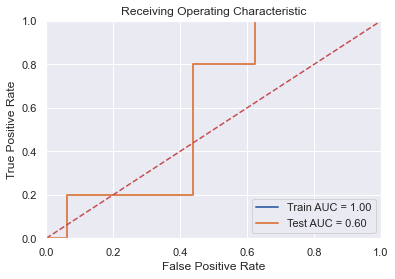

Sensitivity: 0.8
Specificity: 0.5625


In [72]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, svm)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])

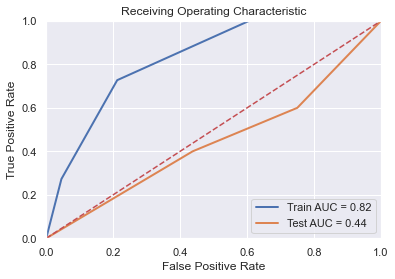

Sensitivity: 1.0
Specificity: 0.0


In [73]:
# plot roc curve
tpr, fpr, threshold = ROC_curve(X_train_select, y_train,X_test_select, y_test, knn)
print('Sensitivity:',tpr[0][tpr[0]>=0.8][0])
print('Specificity:',1-fpr[0][np.where(tpr[0] >= 0.8)[0][0]])